# Practica 10

## Urrutia López Gabriel

In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
cf.go_offline()

import seaborn as sb
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### 1

In [2]:
df = pd.read_csv("songs.csv",low_memory = False)

In [3]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre,song_name,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap,Pathology,NaN,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap,Symbiote,NaN,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap,Venom,NaN,NaN,NaN


### 2

In [4]:
df.isna().mean()

danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
instrumentalness    0.000000
liveness            0.000000
valence             0.000000
tempo               0.000000
id                  0.000000
duration_ms         0.000000
time_signature      0.000000
genre               0.000000
song_name           0.491337
Unnamed: 16         0.984635
Unnamed: 17         0.994280
Unnamed: 18         0.994871
dtype: float64

In [5]:
df.pop("Unnamed: 16")
df.pop("Unnamed: 17")
df.pop("Unnamed: 18")

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
42300    NaN
42301    NaN
42302    NaN
42303    NaN
42304    NaN
Name: Unnamed: 18, Length: 42305, dtype: object

In [6]:
df["song_name"].fillna(df["id"], inplace = True) 

In [7]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap,Venom


In [8]:
ls_trabajo =[x for x in df.columns if x != "song_name"]

In [9]:
df[ls_trabajo].head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap


In [10]:
df[ls_trabajo].isna().mean()

danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
id                  0.0
duration_ms         0.0
time_signature      0.0
genre               0.0
dtype: float64

### 3

C:\Users\gabri\AppData\Local\Temp/ipykernel_9580/1161748254.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



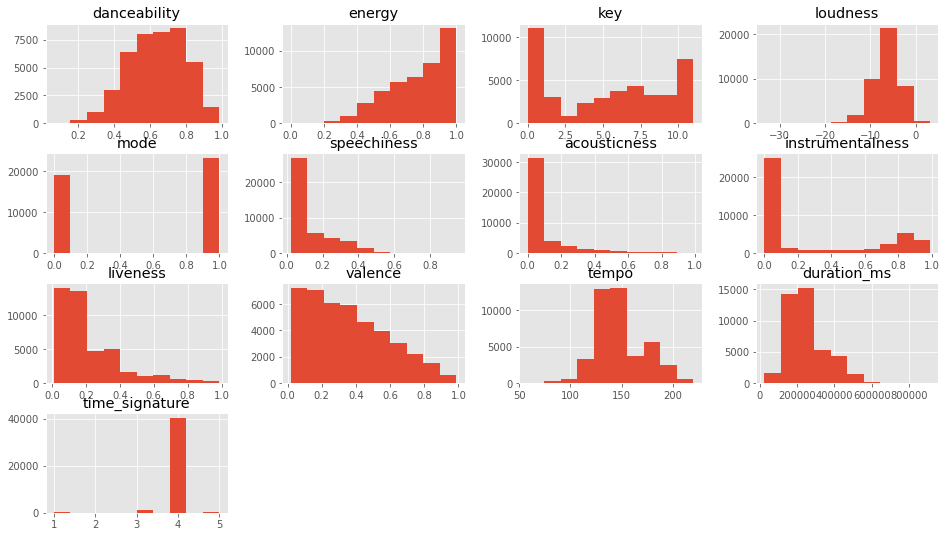

In [11]:
df.drop(['genre'],1).hist()
plt.show()

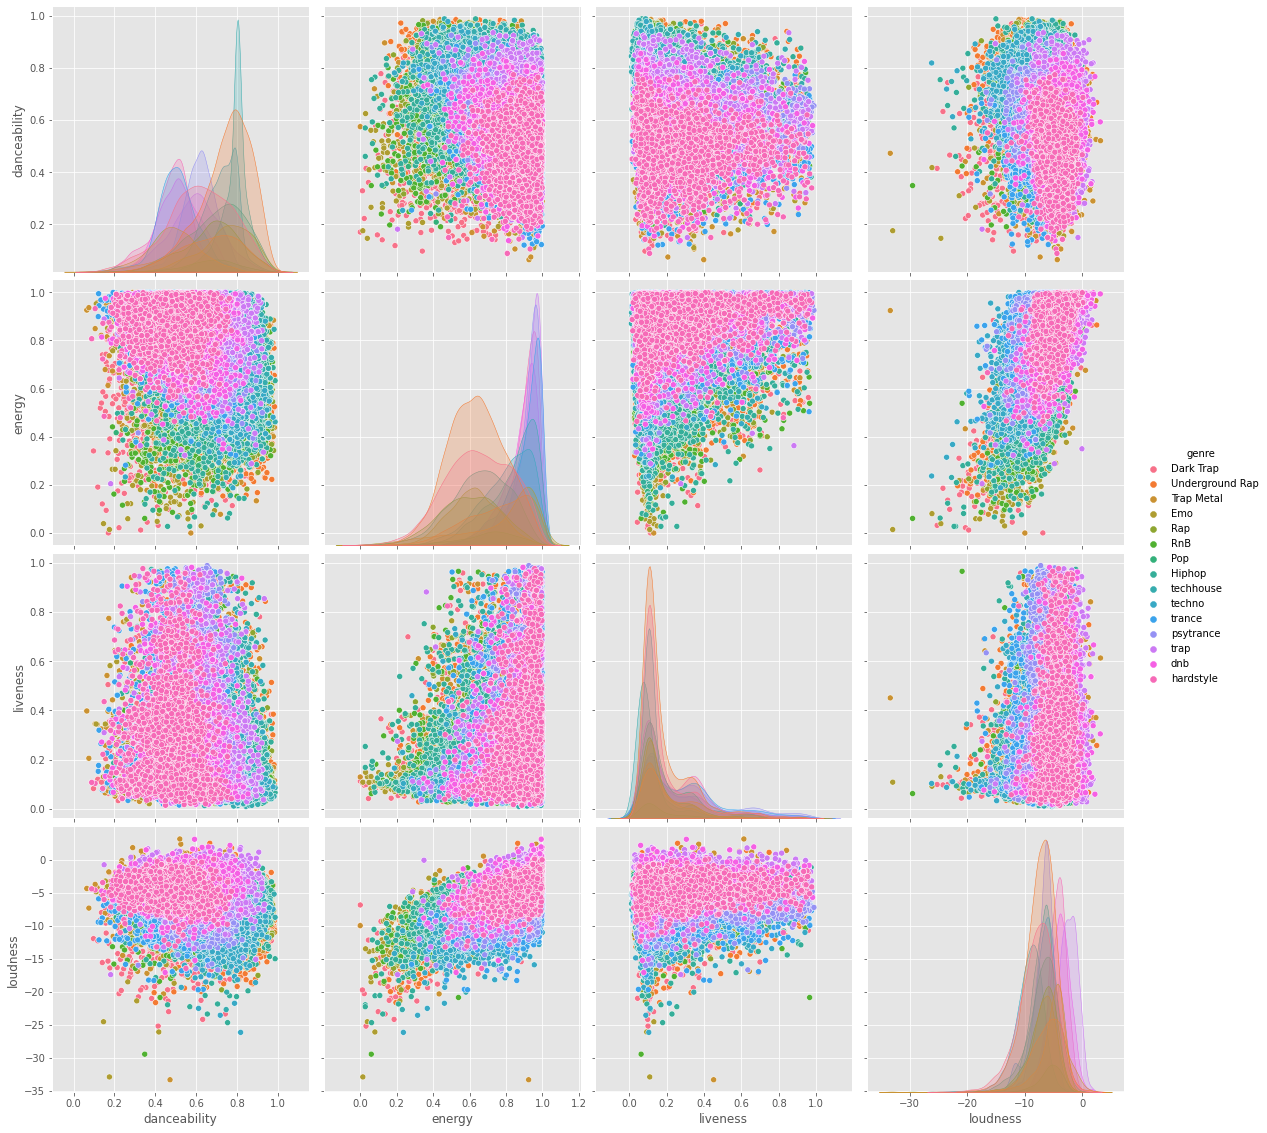

In [12]:
sb.pairplot(df.dropna(), hue='genre',height=4,vars=["danceability","energy","liveness","loudness"],kind='scatter')

In [13]:
X = np.array(df[["danceability","energy","liveness","loudness"]])
y = np.array(df['genre'])
X.shape

(42305, 4)

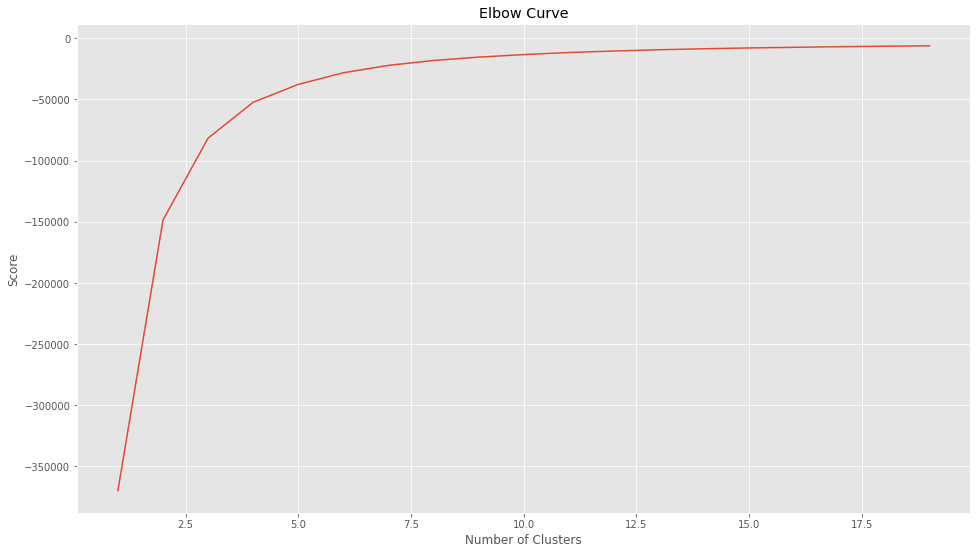

In [14]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[  0.61228797   0.8255519    0.229217    -4.95943094]
 [  0.67305107   0.74127852   0.20265169  -7.14304615]
 [  0.68569881   0.63175246   0.17629012  -9.68445116]
 [  0.57071015   0.90854309   0.26356969  -2.35451296]
 [  0.65986413   0.48936332   0.16390483 -13.57928254]]


C:\Users\gabri\AppData\Local\Temp/ipykernel_9580/1480247571.py:9: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.

c:\users\gabri\appdata\local\programs\python\python39\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:902: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

c:\users\gabri\appdata\local\programs\python\python39\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:904: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



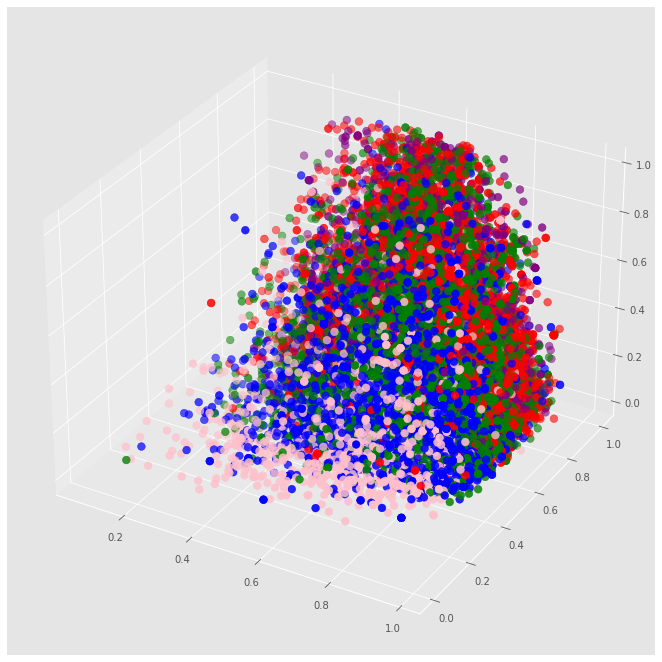

In [16]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue','purple','pink']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], X[:, 3], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], C[:, 3], marker='*', c="yellow", s=100)

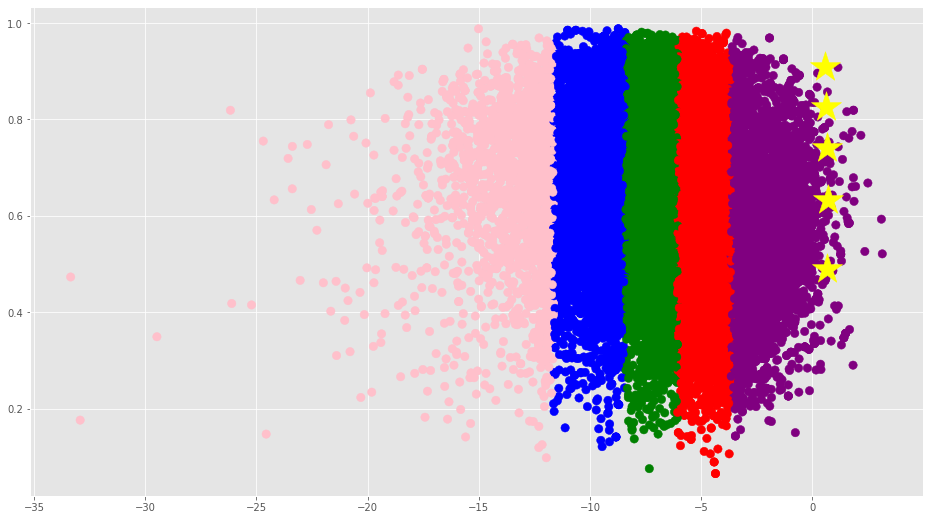

In [17]:
f1 = df['loudness'].values
f2 = df['danceability'].values


plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c="yellow", s=1000)
plt.show()


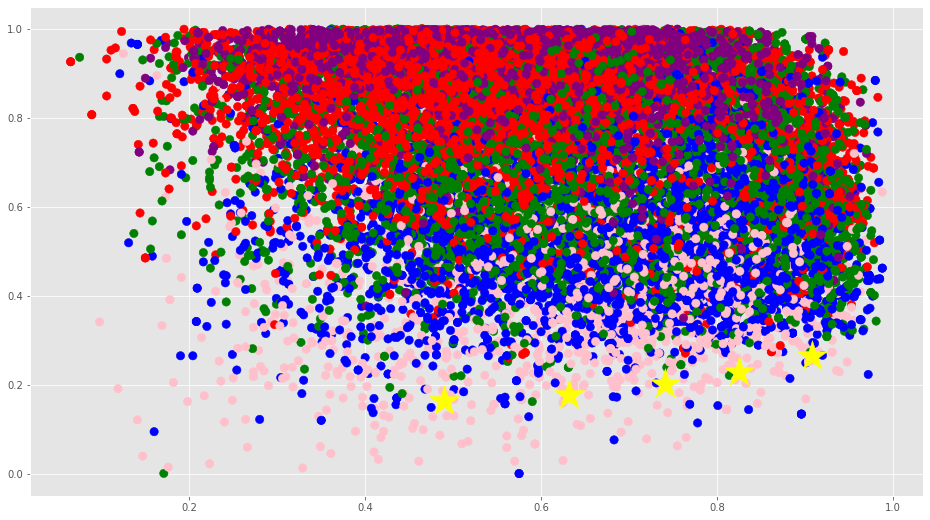

In [18]:
f1 = df['danceability'].values
f2 = df["energy"].values


plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c="yellow", s=1000)
plt.show()


### 4

In [19]:
copy =  pd.DataFrame()
copy['song_name']=df['song_name'].values
copy['genre']=df['genre'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,13320
1,green,12885
2,blue,7360
3,purple,6622
4,pink,2118


In [20]:
df['genre'].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

In [21]:
#vemos el representante del grupo, la cancion  cercana a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([15085, 10353,  7858, 41816, 26848], dtype=int64)

In [22]:
song=df['song_name'].values
for row in closest:
    print(song[row])

Don Life (feat. Lil Wayne)
Up Downs
Change Clothes
1qMpizsteqlAZ1AHcQV6wn
3H0wK45b3jaIzkYo6cZpzy


### 5